In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
 
# importing libraries for linear Regression
import statsmodels
import statsmodels.api as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [73]:
#Reading dataset into bike var 
bike = pd.read_csv('day.csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [74]:
bike.shape 

(730, 16)

In [75]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [76]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [77]:
# Changes season and weathersit var to string type for data preparation 
varlist = ['season']
bike[varlist] = bike[varlist].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
bike[varlist].head()

season
0  spring
1  spring
2  spring
3  spring
4  spring

In [78]:
varlist2 = ['weathersit']
bike[varlist2] = bike[varlist2].apply(lambda x: x.map({1:'Clear/Partly cloudy',2:'Mist/Cloudy',3:'Light Snow/Light Rain /Thunderstorm ',4:'winHeavy Rain/Ice Pallets'}))
bike[varlist2].head()

weathersit
0          Mist/Cloudy
1          Mist/Cloudy
2  Clear/Partly cloudy
3  Clear/Partly cloudy
4  Clear/Partly cloudy

In [79]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        1           1   
1        2  02-01-2018  spring   0     1        0        2           1   
2        3  03-01-2018  spring   0     1        0        3           1   
3        4  04-01-2018  spring   0     1        0        4           1   
4        5  05-01-2018  spring   0     1        0        5           1   

            weathersit       temp     atemp      hum  windspeed  casual  \
0          Mist/Cloudy  14.110847  18.18125  80.5833  10.749882     331   
1          Mist/Cloudy  14.902598  17.68695  69.6087  16.652113     131   
2  Clear/Partly cloudy   8.050924   9.47025  43.7273  16.636703     120   
3  Clear/Partly cloudy   8.200000  10.60610  59.0435  10.739832     108   
4  Clear/Partly cloudy   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

In [80]:
# dropping dateday column,we already have mnth,yr,weekday for same info 
bike = bike.drop('dteday',axis=1)
bike.head()

instant  season  yr  mnth  holiday  weekday  workingday  \
0        1  spring   0     1        0        1           1   
1        2  spring   0     1        0        2           1   
2        3  spring   0     1        0        3           1   
3        4  spring   0     1        0        4           1   
4        5  spring   0     1        0        5           1   

            weathersit       temp     atemp      hum  windspeed  casual  \
0          Mist/Cloudy  14.110847  18.18125  80.5833  10.749882     331   
1          Mist/Cloudy  14.902598  17.68695  69.6087  16.652113     131   
2  Clear/Partly cloudy   8.050924   9.47025  43.7273  16.636703     120   
3  Clear/Partly cloudy   8.200000  10.60610  59.0435  10.739832     108   
4  Clear/Partly cloudy   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

In [81]:
# changing index to instant as itself represnt the data record 
bike.set_index('instant',inplace=True)
bike.head()

season  yr  mnth  holiday  weekday  workingday           weathersit  \
instant                                                                        
1        spring   0     1        0        1           1          Mist/Cloudy   
2        spring   0     1        0        2           1          Mist/Cloudy   
3        spring   0     1        0        3           1  Clear/Partly cloudy   
4        spring   0     1        0        4           1  Clear/Partly cloudy   
5        spring   0     1        0        5           1  Clear/Partly cloudy   

              temp     atemp      hum  windspeed  casual  registered   cnt  
instant                                                                     
1        14.110847  18.18125  80.5833  10.749882     331         654   985  
2        14.902598  17.68695  69.6087  16.652113     131         670   801  
3         8.050924   9.47025  43.7273  16.636703     120        1229  1349  
4         8.200000  10.60610  59.0435  10.739832     108        1454  1562  
5         9.305237  11.46350  43.6957  12.522300      82        1518  1600

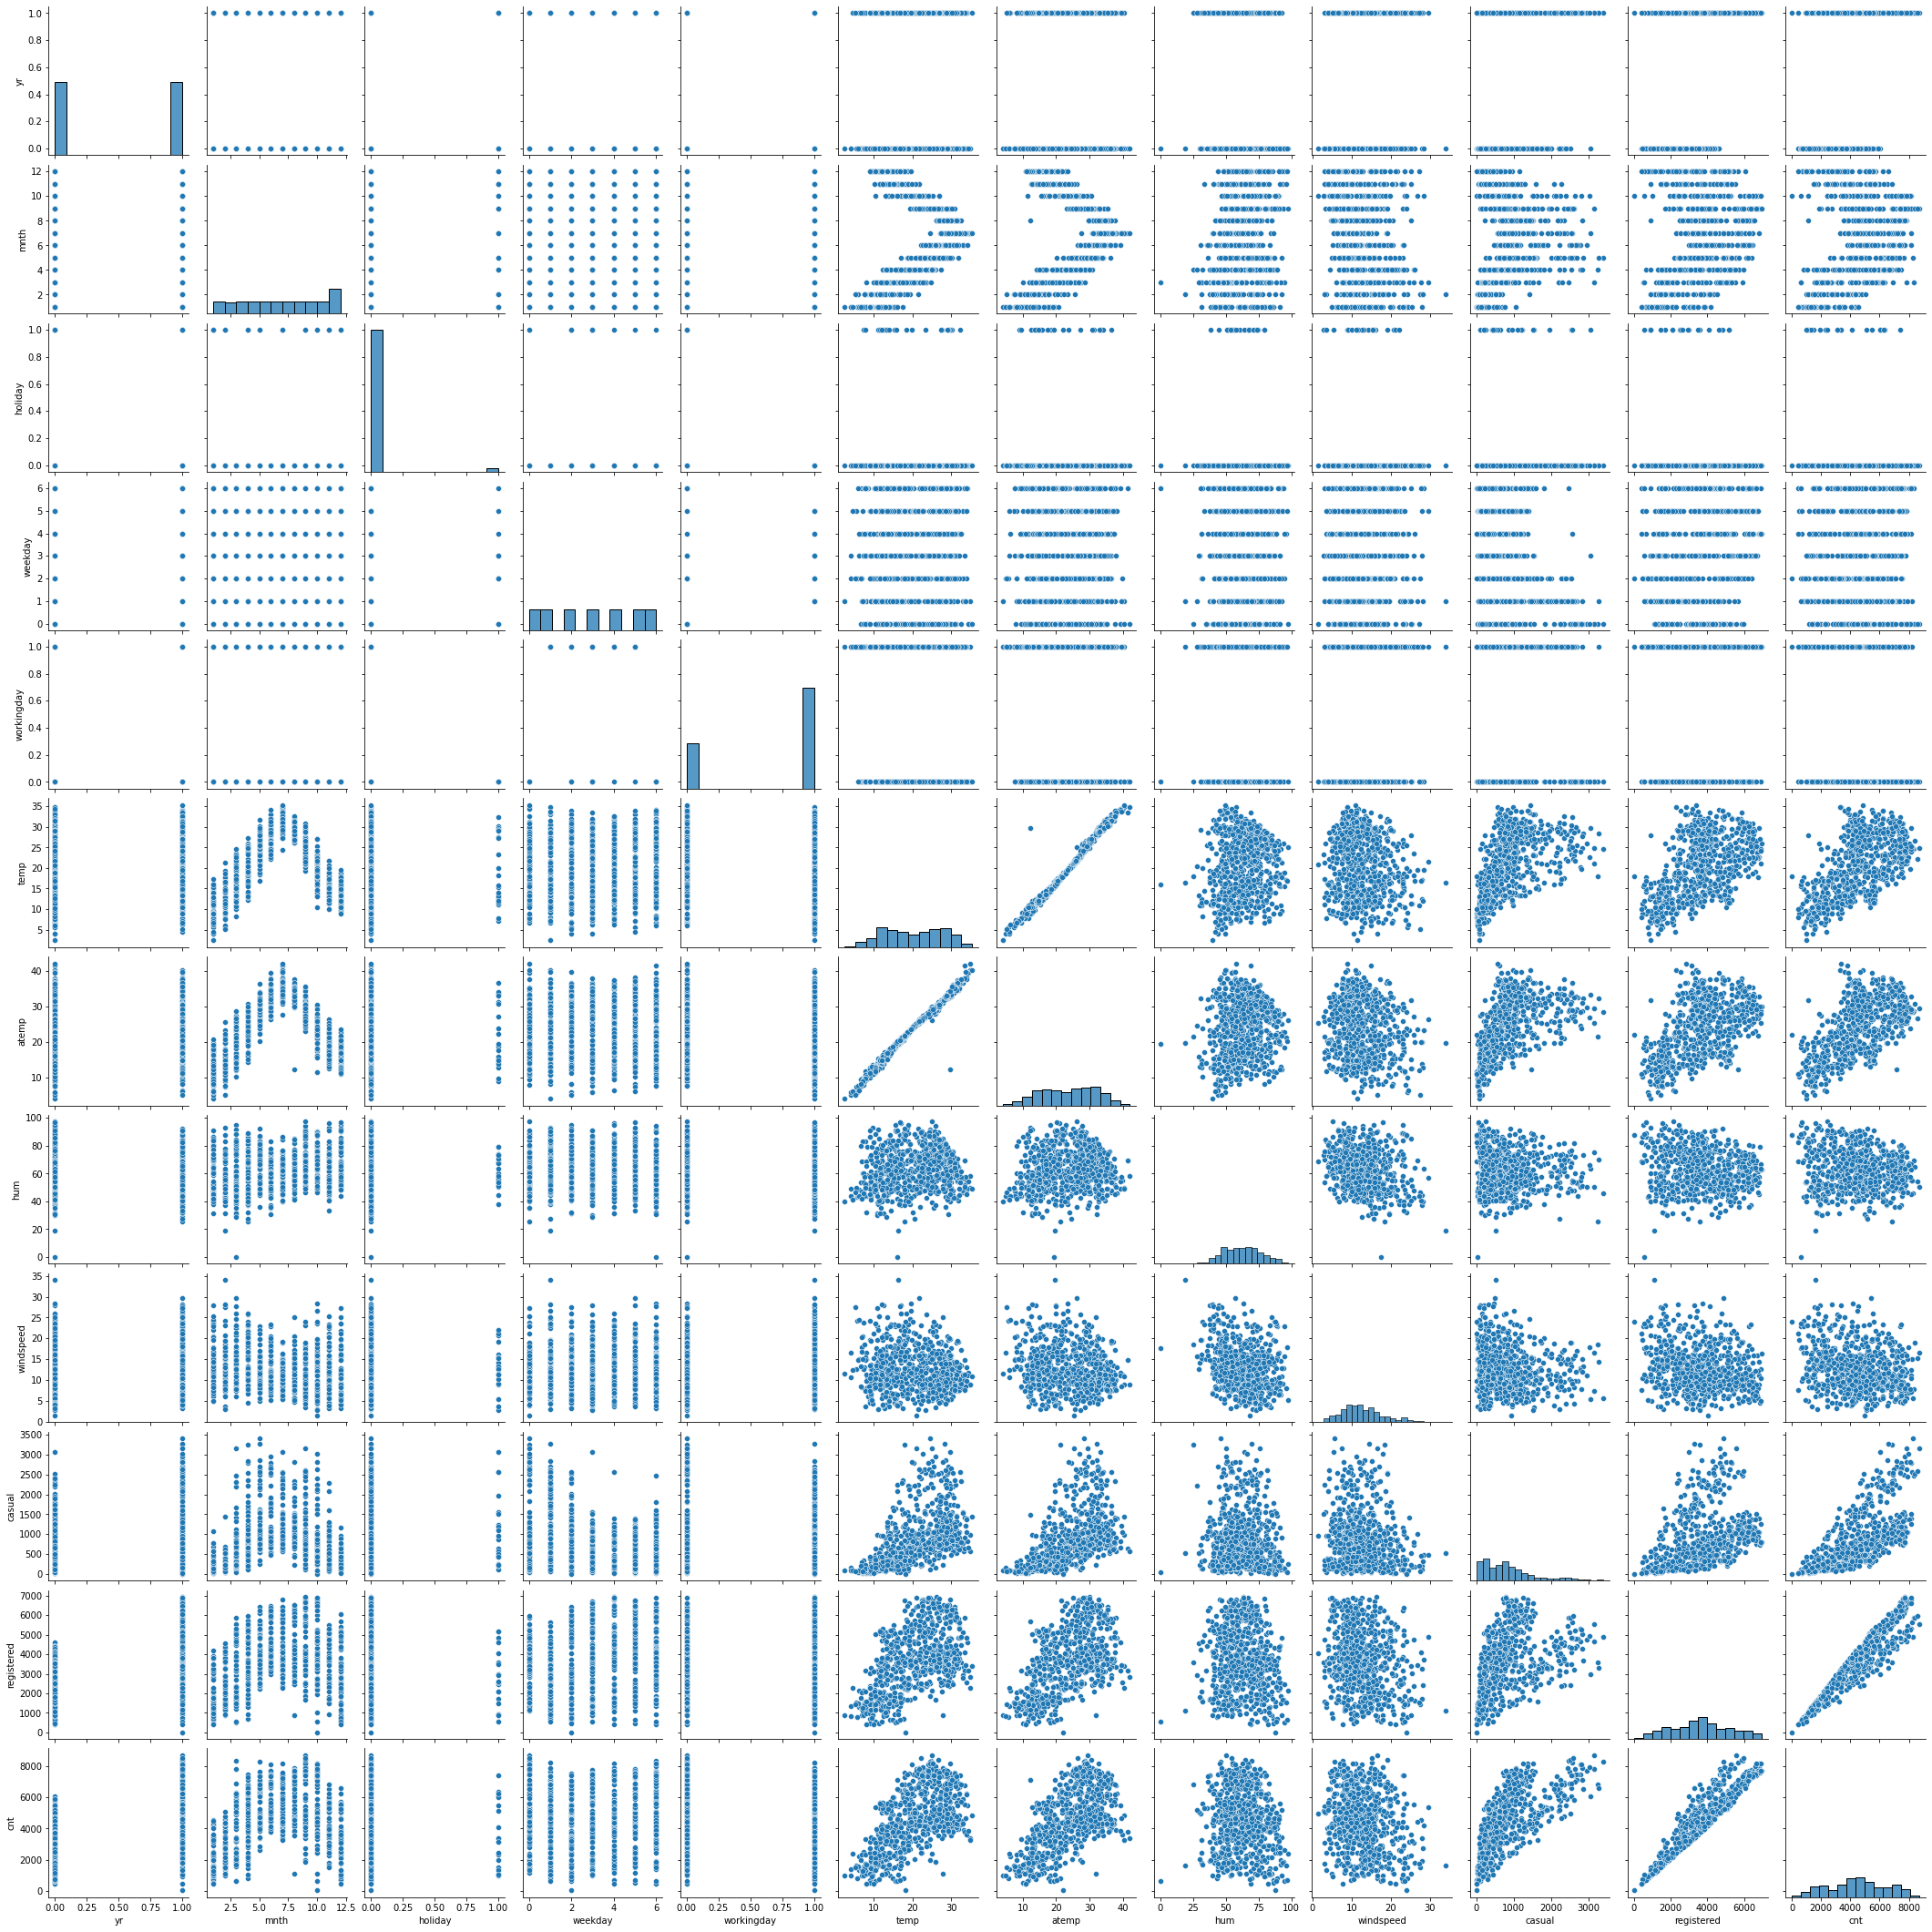

In [82]:
sns.pairplot(bike)
plt.show()

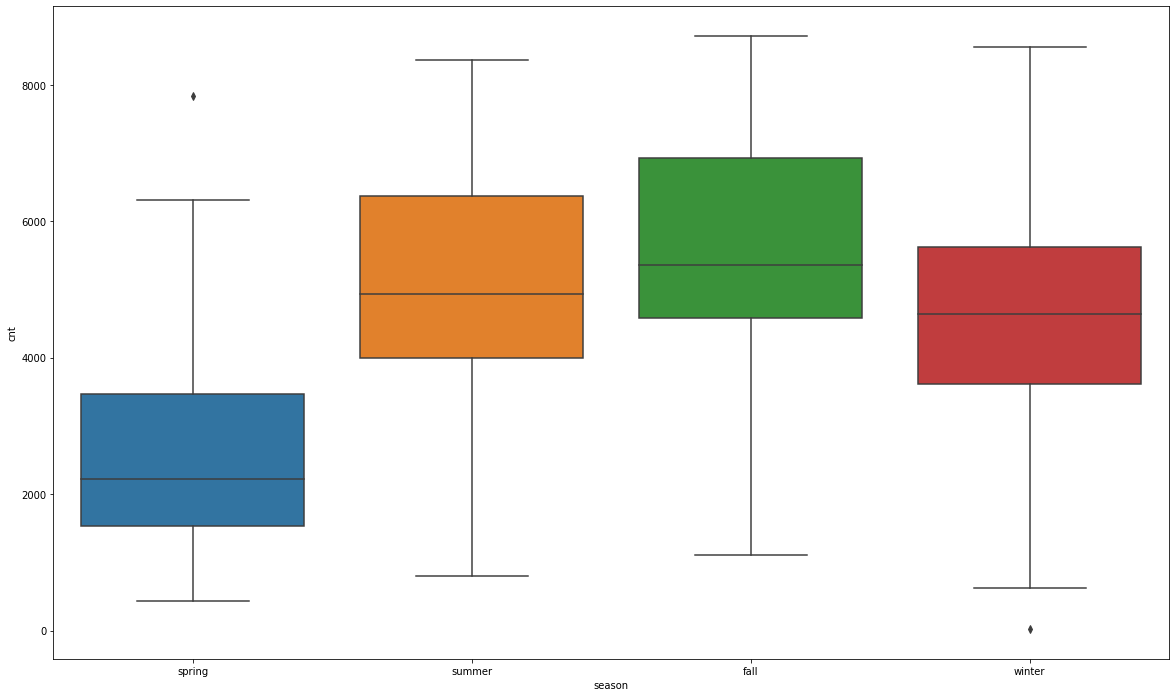

In [83]:
plt.figure(figsize=(20,12))
sns.boxplot(x='season',y='cnt',data=bike)
plt.show()


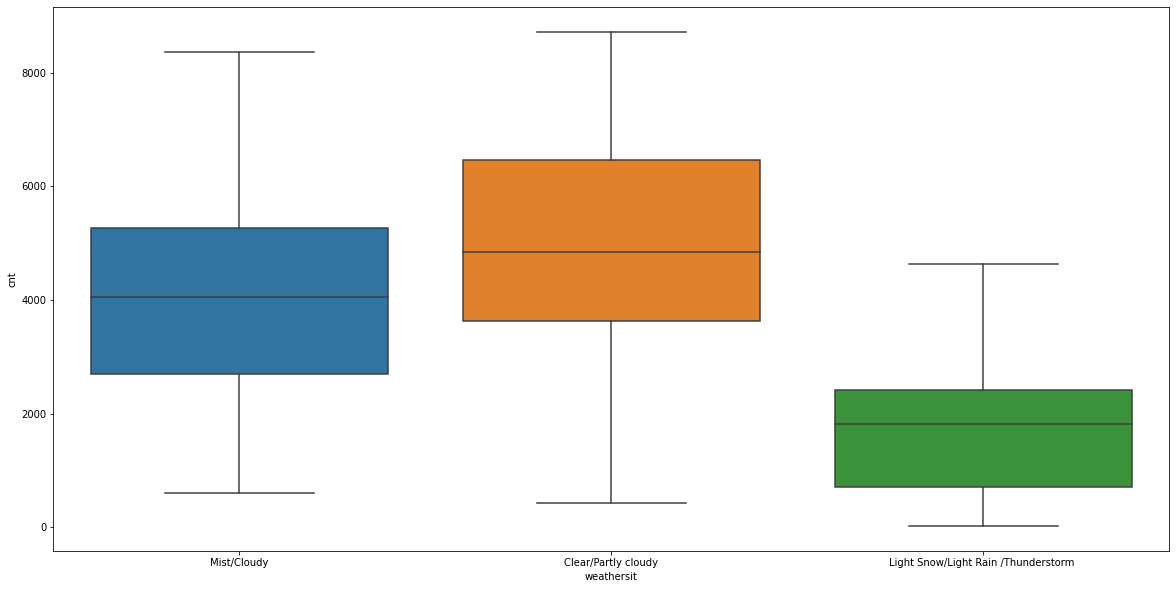

In [84]:
plt.figure(figsize=(20,10))
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.show()

# Data visualization
we have plotted pairplot for numeric variables, which shows cnt variable relationship with others which by seeing we can say most of variable are showing positive correlation with it and while on other hand fews show somewhat minor negative correlation.

For categorical variable we have plotted boxplot, for season we can clearly see that fall is at top followed by summer then with winter and spring.

Weathersit boxplot shows that clear/partly cloudy is high in relationship followed by mist/cloudy and hten with light snow

#Encoding & Scaling
Converting categorical var back to numeric dummies var. 
dummies we required is n-1(n=paramter)


In [85]:
# creating dummy variable for season and weathersit for data modelling
status = pd.get_dummies(bike['season'],drop_first=True)
status.head()

spring  summer  winter
instant                        
1             1       0       0
2             1       0       0
3             1       0       0
4             1       0       0
5             1       0       0

In [86]:
status2 = pd.get_dummies(bike['weathersit'],drop_first=True)
status2.head()

Light Snow/Light Rain /Thunderstorm   Mist/Cloudy
instant                                                   
1                                           0            1
2                                           0            1
3                                           0            0
4                                           0            0
5                                           0            0

In [87]:
status3 = pd.get_dummies(bike['mnth'],drop_first=True)
status.head()

spring  summer  winter
instant                        
1             1       0       0
2             1       0       0
3             1       0       0
4             1       0       0
5             1       0       0

In [88]:
bike = pd.concat([bike,status,status2,status3], axis=1)
bike.head()

season  yr  mnth  holiday  weekday  workingday           weathersit  \
instant                                                                        
1        spring   0     1        0        1           1          Mist/Cloudy   
2        spring   0     1        0        2           1          Mist/Cloudy   
3        spring   0     1        0        3           1  Clear/Partly cloudy   
4        spring   0     1        0        4           1  Clear/Partly cloudy   
5        spring   0     1        0        5           1  Clear/Partly cloudy   

              temp     atemp      hum  ...  3  4  5  6  7  8  9  10  11  12  
instant                                ...                                   
1        14.110847  18.18125  80.5833  ...  0  0  0  0  0  0  0   0   0   0  
2        14.902598  17.68695  69.6087  ...  0  0  0  0  0  0  0   0   0   0  
3         8.050924   9.47025  43.7273  ...  0  0  0  0  0  0  0   0   0   0  
4         8.200000  10.60610  59.0435  ...  0  0  0  0  0  0  0   0   0   0  
5         9.305237  11.46350  43.6957  ...  0  0  0  0  0  0  0   0   0   0  

[5 rows x 30 columns]

In [89]:
#Remvoing orginal season and weathersit var, using dummies for further model fit
bike=bike.drop(['season','weathersit','mnth'],axis=1)
bike.head()

yr  holiday  weekday  workingday       temp     atemp      hum  \
instant                                                                   
1         0        0        1           1  14.110847  18.18125  80.5833   
2         0        0        2           1  14.902598  17.68695  69.6087   
3         0        0        3           1   8.050924   9.47025  43.7273   
4         0        0        4           1   8.200000  10.60610  59.0435   
5         0        0        5           1   9.305237  11.46350  43.6957   

         windspeed  casual  registered  ...  3  4  5  6  7  8  9  10  11  12  
instant                                 ...                                   
1        10.749882     331         654  ...  0  0  0  0  0  0  0   0   0   0  
2        16.652113     131         670  ...  0  0  0  0  0  0  0   0   0   0  
3        16.636703     120        1229  ...  0  0  0  0  0  0  0   0   0   0  
4        10.739832     108        1454  ...  0  0  0  0  0  0  0   0   0   0  
5        12.522300      82        1518  ...  0  0  0  0  0  0  0   0   0   0  

[5 rows x 27 columns]

In [90]:
bike_train,bike_test=train_test_split(bike,train_size=0.70,random_state=100)
bike_train.head()

yr  holiday  weekday  workingday       temp    atemp      hum  \
instant                                                                  
577       1        0        3           1  29.246653  33.1448  70.4167   
427       1        0        0           0  16.980847  20.6746  62.1250   
729       1        0        1           1  10.489153  11.5850  48.3333   
483       1        0        0           0  15.443347  18.8752  48.9583   
112       0        0        0           0  13.803347  16.0977  72.9583   

         windspeed  casual  registered  ...  3  4  5  6  7  8  9  10  11  12  
instant                                 ...                                   
577      11.083475     968        6248  ...  0  0  0  0  1  0  0   0   0   0  
427      10.792293     956        3110  ...  1  0  0  0  0  0  0   0   0   0  
729      23.500518     364        1432  ...  0  0  0  0  0  0  0   0   0   1  
483       8.708325    1120        3100  ...  0  1  0  0  0  0  0   0   0   0  
112      14.707907     177        1506  ...  0  1  0  0  0  0  0   0   0   0  

[5 rows x 27 columns]

In [91]:
# Scaling the numeric variables 
# 1. Instantiate an object 
scaler = MinMaxScaler()

# Create a list of numeric var
num_vars=['temp','atemp','hum','windspeed','casual','registered','cnt']

#2. Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

yr  holiday  weekday  workingday      temp     atemp       hum  \
instant                                                                   
577       1        0        3           1  0.815169  0.766351  0.725633   
427       1        0        0           0  0.442393  0.438975  0.640189   
729       1        0        1           1  0.245101  0.200348  0.498067   
483       1        0        0           0  0.395666  0.391735  0.504508   
112       0        0        0           0  0.345824  0.318819  0.751824   

         windspeed    casual  registered  ...  3  4  5  6  7  8  9  10  11  12  
instant                                   ...                                   
577       0.264686  0.294422    0.899220  ...  0  0  0  0  1  0  0   0   0   0  
427       0.255342  0.290765    0.446145  ...  1  0  0  0  0  0  0   0   0   0  
729       0.663106  0.110332    0.203869  ...  0  0  0  0  0  0  0   0   0   1  
483       0.188475  0.340750    0.444701  ...  0  1  0  0  0  0  0   0   0   0  
112       0.380981  0.053337    0.214554  ...  0  1  0  0  0  0  0   0   0   0  

[5 rows x 27 columns]

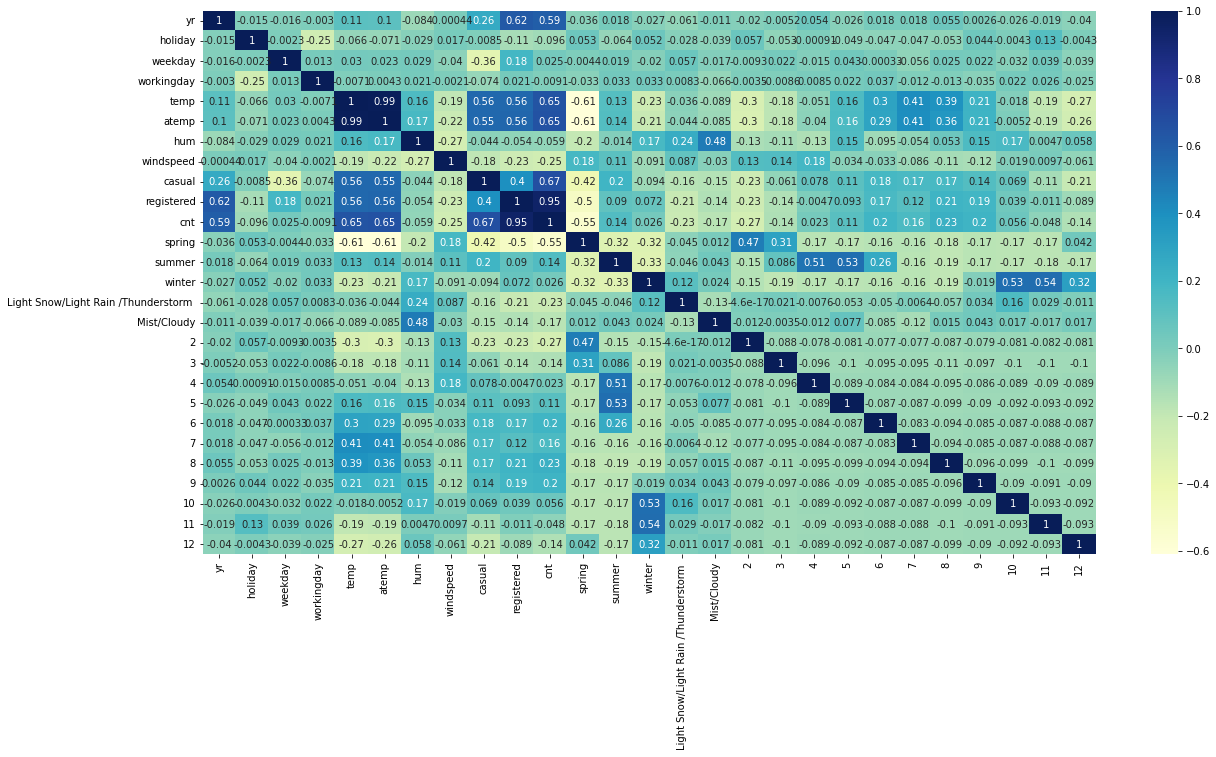

In [92]:
plt.figure(figsize=(20,10))
sns.heatmap(bike_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [93]:
# X_train,y_train
y_train =bike_train.pop('cnt')
X_train =bike_train

bike_train_sm= sn.add_constant(X_train)

lr=sn.OLS(y_train,bike_train_sm)

lr_model=lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.100e+28
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:41   Log-Likelihood:                 15758.
No. Observations:                 510   AIC:                        -3.146e+04
Df Residuals:                     483   BIC:                        -3.135e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 3.608e-16   4.66e-15      0.077      0.938   -8.79e-15    9.51e-15
yr                                   -1.986e-16   1.44e-15     -0.138      0.890   -3.03e-15    2.63e-15
holiday                                2.29e-16   2.88e-15      0.080      0.937   -5.42e-15    5.88e-15
weekday                              -2.254e-15   2.61e-16     -8.654      0.000   -2.77e-15   -1.74e-15
workingday                            -4.74e-16   9.78e-16     -0.485      0.628    -2.4e-15    1.45e-15
temp                                  2.359e-16   1.54e-14      0.015      0.988   -2.99e-14    3.04e-14
atemp                                -7.702e-16   1.48e-14     -0.052      0.958   -2.98e-14    2.83e-14
hum                                  -6.015e-16   4.19e-15     -0.144      0.886   -8.82e-15    7.62e-15
windspeed                            -4.111e-16   2.96e-15     -0.139      0.890   -6.23e-15     5.4e-15
casual                                   0.3775   3.21e-15   1.18e+14      0.000       0.377       0.377
registered                               0.7968    4.3e-15   1.85e+14      0.000       0.797       0.797
spring                               -2.255e-16   3.22e-15     -0.070      0.944   -6.54e-15    6.09e-15
summer                                -2.22e-16   2.81e-15     -0.079      0.937   -5.75e-15    5.31e-15
winter                               -7.373e-18   3.04e-15     -0.002      0.998   -5.97e-15    5.96e-15
Light Snow/Light Rain /Thunderstorm   -2.81e-16   3.06e-15     -0.092      0.927   -6.29e-15    5.73e-15
Mist/Cloudy                          -1.579e-16   1.15e-15     -0.137      0.891   -2.41e-15     2.1e-15
2                                     6.191e-17   2.21e-15      0.028      0.978   -4.27e-15     4.4e-15
3                                    -1.318e-16   2.41e-15     -0.055      0.956   -4.87e-15    4.61e-15
4                                     8.327e-17    3.6e-15      0.023      0.982   -6.99e-15    7.16e-15
5                                     7.893e-17   3.89e-15      0.020      0.984   -7.57e-15    7.72e-15
6                                     -1.18e-16   4.17e-15     -0.028      0.977    -8.3e-15    8.07e-15
7                                    -1.388e-17   4.69e-15     -0.003      0.998   -9.23e-15     9.2e-15
8                                    -4.163e-17   4.49e-15     -0.009      0.993   -8.86e-15    8.78e-15
9                                     1.596e-16   4.06e-15      0.039      0.969   -7.81e-15    8.13e-15
10                                      1.7e-16   3.72e-15      0.046      0.964   -7.13e-15    7.47e-15
11                                    1.978e-16   3.52e-15      0.056      0.955   -6.71e-15    7.11e-15
12                                   -

In [94]:
# check significance, acc to p-value we can drop some variable 
# VIF
vif = pd.DataFrame()
vif['Features'] = bike_train.columns
vif['VIF'] = [variance_inflation_factor(bike_train.values, i) for i in range(bike_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
4                                   temp  455.47
5                                  atemp  383.43
6                                    hum   33.58
9                             registered   32.16
12                                winter   11.27
11                                summer    9.33
21                                     8    8.97
20                                     7    7.74
10                                spring    7.34
18                                     5    6.97
19                                     6    6.82
22                                     9    6.34
23                                    10    6.26
8                                 casual    6.12
7                              windspeed    5.85
0                                     yr    5.83
24                                    11    5.47
17                                     4    5.27
2                                weekday    4.82
3                             workingday    3.78
25                                    12    3.47
16                                     3    3.10
14                           Mist/Cloudy    2.57
15                                     2    1.80
13  Light Snow/Light Rain /Thunderstorm     1.56
1                                holiday    1.19

What variables to keep ?

By vif status variable with vif>5 is not considered fit for model so dropping values above 5

Note: dropping variables drop coeff and change its paramters
starting with temp

In [95]:
X= bike_train.drop('temp',axis=1)

In [96]:
X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.727e+28
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:41   Log-Likelihood:                 15980.
No. Observations:                 510   AIC:                        -3.191e+04
Df Residuals:                     484   BIC:                        -3.180e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1.943e-16   3.02e-15     -0.064      0.949   -6.12e-15    5.73e-15
yr                                    5.143e-16   9.32e-16      0.552      0.581   -1.32e-15    2.34e-15
holiday                              -3.886e-16   1.86e-15     -0.209      0.835   -4.04e-15    3.26e-15
weekday                               -1.65e-15   1.68e-16     -9.838      0.000   -1.98e-15   -1.32e-15
workingday                           -2.711e-16   6.32e-16     -0.429      0.668   -1.51e-15    9.71e-16
atemp                                 7.425e-16   3.37e-15      0.220      0.826   -5.88e-15    7.37e-15
hum                                   2.478e-16    2.7e-15      0.092      0.927   -5.06e-15    5.56e-15
windspeed                             1.023e-16   1.86e-15      0.055      0.956   -3.55e-15    3.75e-15
casual                                   0.3775   2.06e-15   1.84e+14      0.000       0.377       0.377
registered                               0.7968   2.78e-15   2.87e+14      0.000       0.797       0.797
spring                               -5.274e-16   2.08e-15     -0.254      0.800   -4.61e-15    3.55e-15
summer                               -2.533e-16   1.81e-15     -0.140      0.889   -3.81e-15     3.3e-15
winter                               -1.032e-16   1.96e-15     -0.053      0.958   -3.95e-15    3.75e-15
Light Snow/Light Rain /Thunderstorm   1.735e-17   1.98e-15      0.009      0.993   -3.87e-15     3.9e-15
Mist/Cloudy                           5.378e-17   7.43e-16      0.072      0.942   -1.41e-15    1.51e-15
2                                    -2.117e-16   1.43e-15     -0.148      0.882   -3.02e-15    2.59e-15
3                                     1.559e-16   1.55e-15      0.100      0.920   -2.89e-15     3.2e-15
4                                     4.406e-16   2.32e-15      0.190      0.849   -4.12e-15       5e-15
5                                     1.006e-16   2.47e-15      0.041      0.967   -4.75e-15    4.95e-15
6                                     1.041e-16    2.6e-15      0.040      0.968   -5.01e-15    5.22e-15
7                                    -2.047e-16   2.95e-15     -0.069      0.945      -6e-15    5.59e-15
8                                    -1.388e-16   2.81e-15     -0.049      0.961   -5.67e-15    5.39e-15
9                                     -2.29e-16   2.59e-15     -0.088      0.930   -5.32e-15    4.86e-15
10                                   -1.544e-16    2.4e-15     -0.064      0.949   -4.86e-15    4.55e-15
11                                   -1.926e-16   2.27e-15     -0.085      0.933   -4.66e-15    4.28e-15
12                                   -1.249e-16   1.83e-15     -0.068      0.946   -3.73e-15    3.48e-15
======================================

In [97]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
4                                  atemp  47.49
5                                    hum  33.22
8                             registered  31.98
11                                winter  11.20
10                                summer   9.19
20                                     8   8.21
9                                 spring   7.29
19                                     7   7.16
17                                     5   6.66
18                                     6   6.26
22                                    10   6.20
21                                     9   6.11
7                                 casual   5.99
0                                     yr   5.82
23                                    11   5.45
6                              windspeed   5.44
16                                     4   5.20
2                                weekday   4.76
3                             workingday   3.77
24                                    12   3.47
15                                     3   3.05
13                           Mist/Cloudy   2.57
14                                     2   1.80
12  Light Snow/Light Rain /Thunderstorm    1.56
1                                holiday   1.18

In [98]:
X= X.drop('atemp',axis=1)


X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.873e+28
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:41   Log-Likelihood:                 16239.
No. Observations:                 510   AIC:                        -3.243e+04
Df Residuals:                     485   BIC:                        -3.232e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1.027e-15   1.81e-15      0.567      0.571   -2.53e-15    4.58e-15
yr                                    5.438e-16   5.48e-16      0.992      0.322   -5.33e-16    1.62e-15
holiday                                3.73e-17   1.11e-15      0.034      0.973   -2.15e-15    2.22e-15
weekday                              -1.421e-15   1.01e-16    -14.118      0.000   -1.62e-15   -1.22e-15
workingday                            2.442e-16   3.79e-16      0.643      0.520   -5.02e-16     9.9e-16
hum                                   8.916e-16   1.54e-15      0.578      0.563   -2.14e-15    3.92e-15
windspeed                             2.073e-16   1.11e-15      0.186      0.852   -1.98e-15     2.4e-15
casual                                   0.3775   1.19e-15   3.16e+14      0.000       0.377       0.377
registered                               0.7968   1.59e-15   5.03e+14      0.000       0.797       0.797
spring                               -2.168e-16   1.24e-15     -0.174      0.862   -2.66e-15    2.23e-15
summer                                3.123e-16   1.07e-15      0.291      0.771    -1.8e-15    2.42e-15
winter                                7.546e-17   1.17e-15      0.065      0.949   -2.22e-15    2.37e-15
Light Snow/Light Rain /Thunderstorm   2.255e-16   1.19e-15      0.190      0.849   -2.11e-15    2.56e-15
Mist/Cloudy                           4.684e-17   4.45e-16      0.105      0.916   -8.28e-16    9.22e-16
2                                     5.529e-17    8.5e-16      0.065      0.948   -1.61e-15    1.73e-15
3                                    -2.689e-17   8.86e-16     -0.030      0.976   -1.77e-15    1.71e-15
4                                     8.674e-17   1.32e-15      0.066      0.948   -2.51e-15    2.68e-15
5                                     4.163e-16   1.35e-15      0.309      0.757   -2.23e-15    3.06e-15
6                                     2.637e-16   1.35e-15      0.195      0.846    -2.4e-15    2.93e-15
7                                     4.788e-16   1.55e-15      0.308      0.758   -2.57e-15    3.53e-15
8                                     1.874e-16   1.54e-15      0.121      0.903   -2.85e-15    3.22e-15
9                                     2.541e-16   1.47e-15      0.173      0.863   -2.64e-15    3.14e-15
10                                   -6.765e-17   1.39e-15     -0.049      0.961   -2.79e-15    2.66e-15
11                                    -2.55e-16   1.35e-15     -0.189      0.850    -2.9e-15    2.39e-15
12                                   -4.319e-16   1.09e-15     -0.395      0.693   -2.58e-15    1.71e-15
==============================================================================
Omnibus:                      273.972   Durbin-Watson:          

In [99]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
4                                    hum  28.48
7                             registered  28.41
10                                winter  11.04
9                                 summer   8.98
8                                 spring   7.25
19                                     8   6.39
21                                    10   5.71
0                                     yr   5.57
6                                 casual   5.57
16                                     5   5.41
5                              windspeed   5.39
22                                    11   5.28
20                                     9   5.27
18                                     7   4.93
2                                weekday   4.75
15                                     4   4.58
17                                     6   4.44
3                             workingday   3.76
23                                    12   3.39
14                                     3   2.73
12                           Mist/Cloudy   2.55
13                                     2   1.77
11  Light Snow/Light Rain /Thunderstorm    1.56
1                                holiday   1.17

In [100]:
X= X.drop('hum',axis=1)


X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.276e+29
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:41   Log-Likelihood:                 16857.
No. Observations:                 510   AIC:                        -3.367e+04
Df Residuals:                     486   BIC:                        -3.356e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 2.914e-16   4.56e-16      0.638      0.523   -6.05e-16    1.19e-15
yr                                   -1.778e-16   1.63e-16     -1.090      0.276   -4.98e-16    1.43e-16
holiday                               3.712e-16   3.31e-16      1.122      0.263   -2.79e-16    1.02e-15
weekday                              -3.898e-16   2.99e-17    -13.016      0.000   -4.49e-16   -3.31e-16
workingday                            3.326e-16   1.13e-16      2.952      0.003    1.11e-16    5.54e-16
windspeed                             5.551e-17   3.18e-16      0.174      0.862    -5.7e-16    6.81e-16
casual                                   0.3775   3.55e-16   1.06e+15      0.000       0.377       0.377
registered                               0.7968   4.71e-16   1.69e+15      0.000       0.797       0.797
spring                                1.197e-16    3.7e-16      0.323      0.747   -6.07e-16    8.47e-16
summer                               -4.129e-16   3.19e-16     -1.293      0.197   -1.04e-15    2.15e-16
winter                                7.546e-17   3.48e-16      0.217      0.828   -6.07e-16    7.58e-16
Light Snow/Light Rain /Thunderstorm   6.635e-16   3.36e-16      1.978      0.049    4.27e-18    1.32e-15
Mist/Cloudy                           2.446e-16   1.14e-16      2.139      0.033    1.99e-17    4.69e-16
2                                    -3.138e-16   2.53e-16     -1.241      0.215   -8.11e-16    1.83e-16
3                                     4.554e-17   2.64e-16      0.173      0.863   -4.73e-16    5.64e-16
4                                     4.753e-16   3.93e-16      1.209      0.227   -2.97e-16    1.25e-15
5                                     6.245e-17   3.99e-16      0.157      0.876   -7.21e-16    8.46e-16
6                                    -9.021e-17   4.03e-16     -0.224      0.823   -8.82e-16    7.02e-16
7                                    -1.249e-16   4.61e-16     -0.271      0.787   -1.03e-15    7.82e-16
8                                    -8.153e-17   4.58e-16     -0.178      0.859   -9.81e-16    8.18e-16
9                                    -1.067e-16   4.35e-16     -0.245      0.806   -9.61e-16    7.48e-16
10                                   -1.457e-16   4.11e-16     -0.355      0.723   -9.53e-16    6.61e-16
11                                    9.541e-17   4.01e-16      0.238      0.812   -6.92e-16    8.83e-16
12                                   -1.605e-17   3.24e-16     -0.050      0.961   -6.53e-16     6.2e-16
==============================================================================
Omnibus:                      147.429   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.787
Skew:      

In [101]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
6                             registered  28.14
9                                 winter  10.24
8                                 summer   8.00
5                                 casual   5.52
0                                     yr   5.52
4                              windspeed   5.32
20                                    10   5.22
15                                     5   4.99
18                                     8   4.91
21                                    11   4.90
2                                weekday   4.71
7                                 spring   4.64
14                                     4   4.41
19                                     9   4.16
16                                     6   4.03
17                                     7   3.81
3                             workingday   3.65
22                                    12   3.06
13                                     3   2.66
11                           Mist/Cloudy   1.79
12                                     2   1.75
10  Light Snow/Light Rain /Thunderstorm    1.36
1                                holiday   1.17

In [102]:
X= X.drop('registered',axis=1)


X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     142.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.29e-196
Time:                        16:00:41   Log-Likelihood:                 550.73
No. Observations:                 510   AIC:                            -1055.
Df Residuals:                     487   BIC:                            -958.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2216      0.034      6.605      0.000       0.156       0.288
yr                                       0.2146      0.008     27.228      0.000       0.199       0.230
holiday                                 -0.0961      0.025     -3.842      0.000      -0.145      -0.047
weekday                                  0.0170      0.002      7.877      0.000       0.013       0.021
workingday                              -0.0102      0.009     -1.182      0.238      -0.027       0.007
windspeed                               -0.1081      0.024     -4.517      0.000      -0.155      -0.061
casual                                   0.3541      0.027     13.009      0.000       0.301       0.408
spring                                  -0.0814      0.028     -2.892      0.004      -0.137      -0.026
summer                                  -0.0183      0.024     -0.746      0.456      -0.066       0.030
winter                                   0.0864      0.026      3.277      0.001       0.035       0.138
Light Snow/Light Rain /Thunderstorm     -0.2393      0.023    -10.251      0.000      -0.285      -0.193
Mist/Cloudy                             -0.0608      0.008     -7.300      0.000      -0.077      -0.044
2                                        0.0535      0.019      2.778      0.006       0.016       0.091
3                                        0.1007      0.020      5.107      0.000       0.062       0.139
4                                        0.1228      0.030      4.143      0.000       0.065       0.181
5                                        0.1909      0.029      6.505      0.000       0.133       0.249
6                                        0.2075      0.029      7.047      0.000       0.150       0.265
7                                        0.1754      0.034      5.084      0.000       0.108       0.243
8                                        0.1972      0.034      5.804      0.000       0.130       0.264
9                                        0.2144      0.032      6.718      0.000       0.152       0.277
10                                       0.0869      0.031      2.781      0.006       0.026       0.148
11                                       0.0318      0.031      1.034      0.302      -0.029       0.092
12                                       0.0370      0.025      1.493      0.136      -0.012       0.086
==============================================================================
Omnibus:                       77.353   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.935
Skew:                          -0.844   Prob(JB):                     5.07e-35
Kurtosis:                       5.140

In [103]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
8                                 winter  9.21
7                                 summer  7.86
5                                 casual  5.52
4                              windspeed  5.22
19                                    10  4.87
20                                    11  4.73
6                                 spring  4.48
14                                     5  4.08
2                                weekday  3.98
13                                     4  3.93
3                             workingday  3.65
17                                     8  3.10
21                                    12  2.91
15                                     6  2.90
18                                     9  2.66
16                                     7  2.51
12                                     3  2.36
0                                     yr  2.27
11                                     2  1.69
10                           Mist/Cloudy  1.67
9   Light Snow/Light Rain /Thunderstorm   1.15
1                                holiday  1.14

In [104]:
X= X.drop('winter',axis=1)


X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.26e-195
Time:                        16:00:41   Log-Likelihood:                 545.17
No. Observations:                 510   AIC:                            -1046.
Df Residuals:                     488   BIC:                            -953.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2773      0.029      9.490      0.000       0.220       0.335
yr                                       0.2156      0.008     27.109      0.000       0.200       0.231
holiday                                 -0.1005      0.025     -3.984      0.000      -0.150      -0.051
weekday                                  0.0168      0.002      7.700      0.000       0.013       0.021
workingday                              -0.0096      0.009     -1.104      0.270      -0.027       0.008
windspeed                               -0.1110      0.024     -4.595      0.000      -0.158      -0.064
casual                                   0.3535      0.027     12.858      0.000       0.299       0.407
spring                                  -0.1363      0.023     -5.968      0.000      -0.181      -0.091
summer                                  -0.0492      0.023     -2.154      0.032      -0.094      -0.004
Light Snow/Light Rain /Thunderstorm     -0.2414      0.024    -10.242      0.000      -0.288      -0.195
Mist/Cloudy                             -0.0605      0.008     -7.188      0.000      -0.077      -0.044
2                                        0.0539      0.019      2.772      0.006       0.016       0.092
3                                        0.0923      0.020      4.675      0.000       0.053       0.131
4                                        0.0991      0.029      3.414      0.001       0.042       0.156
5                                        0.1668      0.029      5.814      0.000       0.110       0.223
6                                        0.1724      0.028      6.223      0.000       0.118       0.227
7                                        0.1203      0.030      3.955      0.000       0.061       0.180
8                                        0.1421      0.030      4.766      0.000       0.083       0.201
9                                        0.1786      0.030      5.898      0.000       0.119       0.238
10                                       0.1187      0.030      3.955      0.000       0.060       0.178
11                                       0.0638      0.029      2.167      0.031       0.006       0.122
12                                       0.0589      0.024      2.443      0.015       0.012       0.106
==============================================================================
Omnibus:                       77.493   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.702
Skew:                          -0.859   Prob(JB):                     6.94e-34
Kurtosis:                       5.057   Cond. No.                         80.6
===============================================================

In [105]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
7                                 summer  7.64
5                                 casual  5.46
4                              windspeed  5.18
13                                     5  4.08
12                                     4  3.93
2                                weekday  3.92
6                                 spring  3.88
3                             workingday  3.56
16                                     8  2.99
14                                     6  2.89
18                                    10  2.68
17                                     9  2.65
15                                     7  2.44
19                                    11  2.41
11                                     3  2.35
0                                     yr  2.26
10                                     2  1.66
9                            Mist/Cloudy  1.65
20                                    12  1.61
8   Light Snow/Light Rain /Thunderstorm   1.15
1                                holiday  1.14

In [106]:
# Dropping summer? vif < 5 ? because it has high p-value thus making it statistical insignificant 
X= X.drop('summer',axis=1)


X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     151.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.18e-195
Time:                        16:00:42   Log-Likelihood:                 542.76
No. Observations:                 510   AIC:                            -1044.
Df Residuals:                     489   BIC:                            -954.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.2521      0.027      9.381      0.000       0.199       0.305
yr                                       0.2163      0.008     27.121      0.000       0.201       0.232
holiday                                 -0.1021      0.025     -4.034      0.000      -0.152      -0.052
weekday                                  0.0167      0.002      7.609      0.000       0.012       0.021
workingday                              -0.0098      0.009     -1.119      0.264      -0.027       0.007
windspeed                               -0.1149      0.024     -4.754      0.000      -0.162      -0.067
casual                                   0.3492      0.028     12.689      0.000       0.295       0.403
spring                                  -0.1088      0.019     -5.726      0.000      -0.146      -0.071
Light Snow/Light Rain /Thunderstorm     -0.2421      0.024    -10.234      0.000      -0.289      -0.196
Mist/Cloudy                             -0.0618      0.008     -7.339      0.000      -0.078      -0.045
2                                        0.0542      0.020      2.777      0.006       0.016       0.093
3                                        0.0853      0.020      4.365      0.000       0.047       0.124
4                                        0.0787      0.028      2.858      0.004       0.025       0.133
5                                        0.1464      0.027      5.386      0.000       0.093       0.200
6                                        0.1694      0.028      6.099      0.000       0.115       0.224
7                                        0.1485      0.028      5.388      0.000       0.094       0.203
8                                        0.1705      0.027      6.356      0.000       0.118       0.223
9                                        0.2072      0.027      7.581      0.000       0.153       0.261
10                                       0.1472      0.027      5.447      0.000       0.094       0.200
11                                       0.0919      0.026      3.471      0.001       0.040       0.144
12                                       0.0782      0.022      3.476      0.001       0.034       0.122
==============================================================================
Omnibus:                       78.550   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.064
Skew:                          -0.869   Prob(JB):                     2.13e-34
Kurtosis:                       5.068   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

Its a fair good model as each variable have low p-value almost zero which make them statistical fit. This model explain 86% data variance with Rsquare 84%. Great f-statistic 261.2.

Thus we can interpret Year, weekday, casusal are top 3 feature with positive coeff.

In [107]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
5                                 casual  5.28
4                              windspeed  5.02
2                                weekday  3.82
3                             workingday  3.50
6                                 spring  3.17
15                                     8  2.81
12                                     5  2.65
11                                     4  2.62
13                                     6  2.53
17                                    10  2.52
16                                     9  2.50
14                                     7  2.32
18                                    11  2.27
0                                     yr  2.26
10                                     3  2.04
9                                      2  1.64
8                            Mist/Cloudy  1.60
19                                    12  1.59
7   Light Snow/Light Rain /Thunderstorm   1.15
1                                holiday  1.14

In [108]:
X= X.drop('casual',axis=1)


X_sm = sn.add_constant(X)

lr= sn.OLS(y_train,X_sm)

lr_model = lr.fit()

lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.95e-166
Time:                        16:00:42   Log-Likelihood:                 470.18
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     490   BIC:                            -815.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.3441      0.030     11.550      0.000       0.286       0.403
yr                                       0.2470      0.009     28.207      0.000       0.230       0.264
holiday                                 -0.0955      0.029     -3.276      0.001      -0.153      -0.038
weekday                                  0.0035      0.002      1.556      0.120      -0.001       0.008
workingday                              -0.0236      0.010     -2.357      0.019      -0.043      -0.004
windspeed                               -0.1703      0.027     -6.222      0.000      -0.224      -0.117
spring                                  -0.1199      0.022     -5.489      0.000      -0.163      -0.077
Light Snow/Light Rain /Thunderstorm     -0.3027      0.027    -11.342      0.000      -0.355      -0.250
Mist/Cloudy                             -0.0864      0.009     -9.158      0.000      -0.105      -0.068
2                                        0.0645      0.022      2.871      0.004       0.020       0.109
3                                        0.1436      0.022      6.564      0.000       0.101       0.187
4                                        0.1571      0.031      5.080      0.000       0.096       0.218
5                                        0.2361      0.030      7.814      0.000       0.177       0.296
6                                        0.2656      0.031      8.634      0.000       0.205       0.326
7                                        0.2341      0.031      7.604      0.000       0.174       0.295
8                                        0.2618      0.030      8.797      0.000       0.203       0.320
9                                        0.2986      0.030      9.833      0.000       0.239       0.358
10                                       0.2260      0.030      7.461      0.000       0.167       0.286
11                                       0.1286      0.030      4.242      0.000       0.069       0.188
12                                       0.0872      0.026      3.370      0.001       0.036       0.138
==============================================================================
Omnibus:                       77.355   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.413
Skew:                          -0.711   Prob(JB):                     2.07e-51
Kurtosis:                       5.994   Cond. No.                         74.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
4                              windspeed  4.95
3                             workingday  3.49
2                                weekday  3.12
5                                 spring  3.03
0                                     yr  2.01
10                                     4  1.93
17                                    11  1.88
14                                     8  1.78
11                                     5  1.78
16                                    10  1.75
9                                      3  1.67
12                                     6  1.66
15                                     9  1.64
8                                      2  1.61
7                            Mist/Cloudy  1.55
13                                     7  1.53
18                                    12  1.43
1                                holiday  1.14
6   Light Snow/Light Rain /Thunderstorm   1.11

In [110]:
# Residual analysis
y_train_pred = lr_model.predict(X_sm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


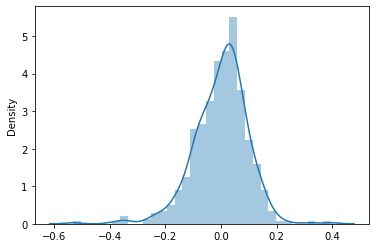

In [111]:
res= y_train - y_train_pred
sns.distplot(res)

Erros are normally disturbed 

Prediction and evaluation 

In [112]:
# test data 
num_vars=['temp','atemp','hum','windspeed','casual','registered','cnt']

#2. Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.head()

yr  holiday  weekday  workingday      temp     atemp       hum  \
instant                                                                   
185       0        1        3           0  0.831783  0.769660  0.657364   
536       1        0        4           1  0.901354  0.842587  0.610133   
300       0        0        6           0  0.511964  0.496145  0.837699   
222       0        0        5           1  0.881625  0.795343  0.437098   
153       0        0        6           0  0.817246  0.741471  0.314298   

         windspeed    casual  registered  ...  3  4  5  6  7  8  9  10  11  12  
instant                                   ...                                   
185       0.084219  0.933557    0.427086  ...  0  0  0  0  1  0  0   0   0   0  
536       0.153728  0.265163    0.767976  ...  0  0  0  1  0  0  0   0   0   0  
300       0.334206  0.072539    0.346376  ...  0  0  0  0  0  0  0   1   0   0  
222       0.339570  0.268820    0.559630  ...  0  0  0  0  0  1  0   0   0   0  
153       0.537414  0.223712    0.608143  ...  0  0  0  1  0  0  0   0   0   0  

[5 rows x 27 columns]

In [113]:
y_test = bike_test.pop('cnt')
X_bike_test = bike_test

In [114]:
X_test_sm = sn.add_constant(X_bike_test)
X_test_sm = X_test_sm.drop(['temp','hum','registered','winter','summer','hum','atemp','casual'],axis=1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [115]:
lr= sn.OLS(y_test,X_test_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     53.22
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.66e-67
Time:                        16:00:42   Log-Likelihood:                 220.39
No. Observations:                 220   AIC:                            -400.8
Df Residuals:                     200   BIC:                            -332.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.4112      0.048      8.523      0.000       0.316       0.506
yr                                       0.2484      0.013     18.945      0.000       0.223       0.274
holiday                                 -0.0790      0.036     -2.205      0.029      -0.150      -0.008
weekday                                  0.0039      0.003      1.254      0.211      -0.002       0.010
workingday                              -0.0263      0.014     -1.879      0.062      -0.054       0.001
windspeed                               -0.0451      0.043     -1.044      0.298      -0.130       0.040
spring                                  -0.2162      0.035     -6.246      0.000      -0.284      -0.148
Light Snow/Light Rain /Thunderstorm     -0.2094      0.042     -5.042      0.000      -0.291      -0.128
Mist/Cloudy                             -0.0740      0.015     -5.100      0.000      -0.103      -0.045
2                                        0.0443      0.031      1.451      0.148      -0.016       0.105
3                                        0.1042      0.037      2.787      0.006       0.030       0.178
4                                        0.0590      0.046      1.271      0.205      -0.033       0.151
5                                        0.1413      0.047      3.014      0.003       0.049       0.234
6                                        0.1723      0.046      3.729      0.000       0.081       0.263
7                                        0.1564      0.046      3.401      0.001       0.066       0.247
8                                        0.1517      0.049      3.102      0.002       0.055       0.248
9                                        0.1785      0.047      3.805      0.000       0.086       0.271
10                                       0.1863      0.047      3.959      0.000       0.093       0.279
11                                      -0.0136      0.048     -0.283      0.778      -0.109       0.081
12                                      -0.0321      0.037     -0.870      0.385      -0.105       0.041
==============================================================================
Omnibus:                       16.517   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.866
Skew:                          -0.520   Prob(JB):                     1.79e-05
Kurtosis:                       4.142   Cond. No.                         84.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
y_test_pred = lr_model.predict(X_test_sm)

In [117]:
#evaluate 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8348632259395444